In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('D:/Download From Internet/gld_price_data.csv')

# Print the full DataFrame
print(df)


           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [2]:
print(len(df))

2290


In [3]:
print(df.isnull().sum())

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


In [4]:
print(df.isnull().sum().sum())


0


In [5]:
print(df.shape) 

(2290, 6)


In [6]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB
None


In [7]:
print(df.describe()) 

               SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798


In [8]:
df = df.dropna()  # Drop rows with any null values

In [9]:
df = df.dropna(axis=1)  # Drop columns with any nulls

In [10]:
df = df.drop_duplicates()

Mean Squared Error (MSE): 513.1465035538185
R-squared Score: 0.00253255371120209
Slope (m): 0.0019237376455211472
Intercept (c): 119.76315133520434


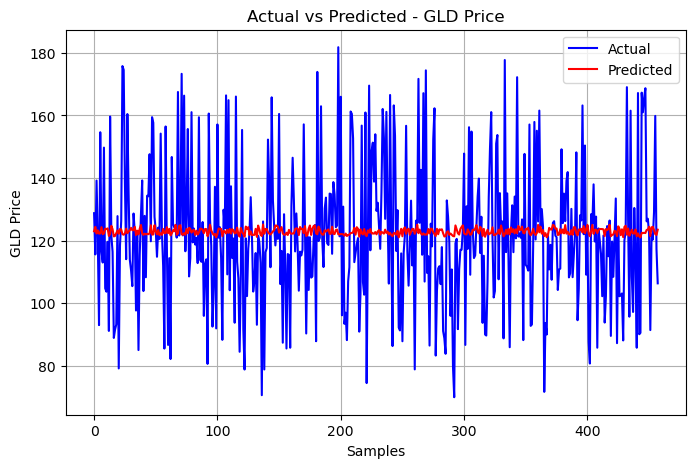

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv('D:/Download From Internet/gld_price_data.csv')

#Define X and Y
X = df[['SPX']]    # Independent variable must be 2D
y = df['GLD']      # Dependent variable

# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Performance Metrics
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

# Visualize Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted - GLD Price')
plt.xlabel('Samples')
plt.ylabel('GLD Price')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error (MSE): 457.3442918441128
R-squared Score: 0.11100233617267297


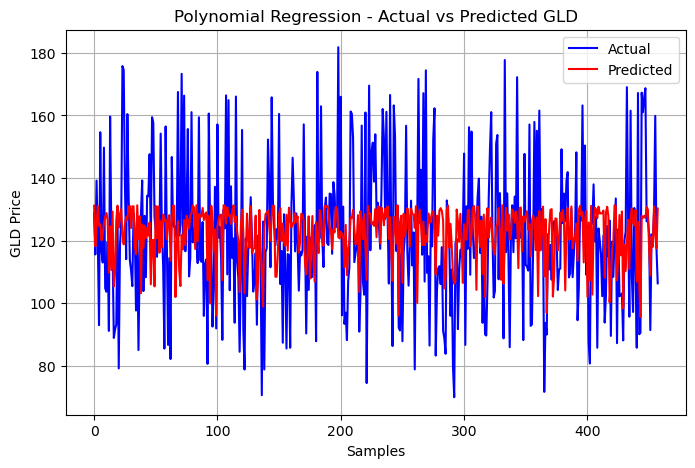

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Load dataset
df = pd.read_csv('D:/Download From Internet/gld_price_data.csv')  

# Define X (independent) and y (dependent)
X = df[['SPX']]   # 🔹 Predictor feature (2D)
y = df['GLD']     # 🔹 Target value

# Transform X into Polynomial Features
poly = PolynomialFeatures(degree=2)  
X_poly = poly.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

# Train model on polynomial-transformed data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Polynomial Regression - Actual vs Predicted GLD')
plt.xlabel('Samples')
plt.ylabel('GLD Price')
plt.legend()
plt.grid(True)
plt.show()


 Mean Squared Error (MSE): 5.469544524374734
 R-squared Score: 0.9900245384549384


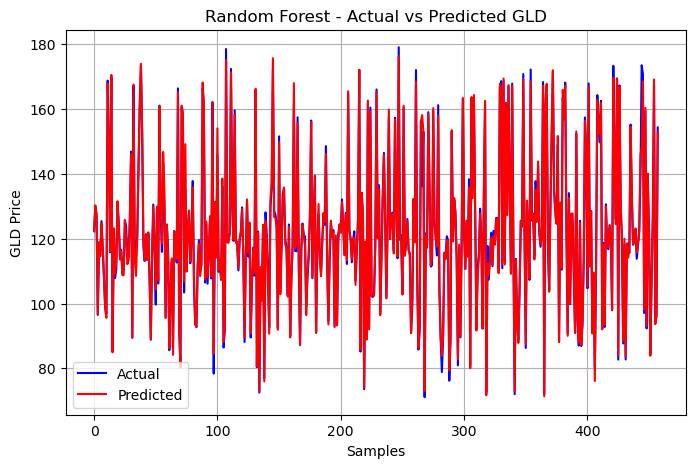

In [5]:
# Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv("D:/Download From Internet/gld_price_data.csv") 


# Define Features (X) and Target (y)
X = df[['SPX', 'USO', 'SLV', 'EUR/USD']] 
y = df['GLD']                            

# Split Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
print(" Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print(" R-squared Score:", r2_score(y_test, y_pred))

# Plot Actual vs Predicted GLD Values
plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Random Forest - Actual vs Predicted GLD')
plt.xlabel('Samples')
plt.ylabel('GLD Price')
plt.legend()
plt.grid(True)
plt.show()
